In [1]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import Dataloader
from models import *
from metric import *

In [3]:
# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y = data_loader.load()


In [4]:
X[1]

array([0.120267, 0.269352, 0.429823, 0.063955, 0.296841, 0.374903,
       0.815812, 0.088881, 0.941223, 0.299334])

In [5]:
# Let's train an example model
parameters = {"n_pieces": 5, "n_clusters" :3, "n_iter":5} # Can be completed
model = KMeansModel(**parameters)
model.fit(X, Y) # Training of the model, using preference data

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11
Itération 0 sur 5
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-6200U CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 14201 rows, 28350 columns and 471245 nonzeros
Model fingerprint: 0xcda3ac76
Coefficient statistics:
  Matrix range     [2e-06, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-04, 1e+00]
Presolve removed 20 rows and 14160 columns
Presolve time: 0.44s
Presolved: 14181 rows, 14190 columns, 398068 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.07s

Barrier statistics:
 Dense cols : 40
 AA' NZ     : 3.839e+05
 Factor NZ  : 3.989e+05 (roug

In [5]:
# First, let's see how our model reconsiders our preferences
# Our data preferences were X[i] >> Y[i] for all i, let's see if our model agrees
print((model.predict_utility(X) - model.predict_utility(Y))[:5]) # Preferred item has a higher utility

# predict_utility returns utility of samples for each cluster, returning shape (n_samples, n_clusters)

[[-5.05110070e-05 -6.76464056e-02  9.42112512e-06]
 [-1.49653690e-01  9.89860206e-02 -2.16392459e-04]
 [-9.30265159e-01 -7.06335404e-02 -3.22723719e-01]
 [-9.10413264e-01  1.70696042e-01  7.28073950e-01]
 [ 1.07741709e-01 -1.44173190e-02  4.76953779e-04]]


In [6]:
for m in range(3):
    for i in range(4):
        for l in range(5):
            print(f'u_{m}_{i}_{l}={model.models[m].getVarByName(f"u_{i}_{l}").x}"')

u_0_0_0=0.0"
u_0_0_1=0.08646103285343631"
u_0_0_2=0.10087509167527615"
u_0_0_3=0.10116184025662649"
u_0_0_4=0.14584769134725942"
u_0_1_0=0.0"
u_0_1_1=0.08834961715759963"
u_0_1_2=0.08834961715759963"
u_0_1_3=0.08834961715759963"
u_0_1_4=0.1165756829870928"
u_0_2_0=0.0"
u_0_2_1=0.0413151843501499"
u_0_2_2=0.0413151843501499"
u_0_2_3=0.0413151843501499"
u_0_2_4=0.07213491182073672"
u_0_3_0=0.0"
u_0_3_1=0.07155975977395049"
u_0_3_2=0.09059806968738517"
u_0_3_3=0.10317634098124265"
u_0_3_4=0.13288877553634731"
u_1_0_0=0.0"
u_1_0_1=0.10125056730159905"
u_1_0_2=0.10647242133807643"
u_1_0_3=0.11280657618305785"
u_1_0_4=0.14630015874046798"
u_1_1_0=0.0"
u_1_1_1=0.08273964830908795"
u_1_1_2=0.08273964830908795"
u_1_1_3=0.08273964830908795"
u_1_1_4=0.11201735312287803"
u_1_2_0=0.0"
u_1_2_1=0.046974887033683736"
u_1_2_2=0.046974887033683736"
u_1_2_3=0.046974887033683736"
u_1_2_4=0.075264832876517"
u_1_3_0=0.0"
u_1_3_1=0.08059988628112906"
u_1_3_2=0.10311291171121231"
u_1_3_3=0.10646115487469243"


In [7]:
print(model.predict_utility(X[:10]))
#print(model.predict_utility(Y[:10]))

[[0.45551302 0.46566576 0.46480107]
 [0.48627052 0.48860414 0.49116257]
 [0.49416802 0.50409375 0.49449294]
 [0.62242018 0.62971055 0.63194887]
 [0.52269111 0.54490355 0.53095495]
 [0.63405798 0.64188737 0.63959235]
 [0.7188861  0.71865596 0.71927444]
 [0.61885436 0.62592701 0.62190465]
 [0.64168404 0.65436077 0.64381257]
 [0.59400359 0.59993596 0.59607851]]


In [6]:
# Or we can directly use the predict_preference method:
print(model.predict_preference(X, Y)[:10]) # For each cluster we see if X is preferred to Y (0) or the contrary (1)
# predict_preference returns preference of samples for each cluster, returning shape (n_samples, n_clusters)
# 0 means that the cluster prefers first argument (here X[i]), 1 means that the cluster prefers second argument (here Y[i])

[[0 0 1]
 [0 1 0]
 [0 0 0]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [0 1 0]]


In [6]:
# We consider that our model explains our data, if for at least one cluster, X[i] >> Y[i]
pairs_explained = np.sum(model.predict_preference(X, Y)[:200] == 0, axis=1) # For each sample check if each clusters prefers X[i] (then is True)
pairs_explained = pairs_explained > 0 # If at least one cluster prefers X[i], then X[i] >> Y[i] is explained
print("Percentage of explained preferences for 5 first samples:", 100*np.sum(pairs_explained) / 200) # Get % or explained pairs

Percentage of explained preferences for 5 first samples: 73.5


In [7]:
# Or we call directly the right metric:
pairs_explained = PairsExplained()
print("Percentage of explained preferences for all samples:", pairs_explained.from_model(model, X, Y))
# Or other possibility:
print("Percentage of explained preferences for all samples:", pairs_explained(model.predict_utility(X), model.predict_utility(Y)))

Percentage of explained preferences for all samples: 0.8974301284935753
Percentage of explained preferences for all samples: 0.8974301284935753


In [10]:
# Now, we can also see how our model clusters our data
print(model.predict_cluster(X, Y)[:10]) # Returns for each sample which cluster is the most likely to have generated the preference.
# The most likely cluster is the one with the highest utility difference U(X[i])-U(Y[i]) for the sample.

[2 1 1 2 0 1 2 2 0 1]


In [8]:
# Ground truth are also provided:
Z = data_loader.get_ground_truth_labels()
# We can see how it compares to our model's predictions:
print(Z[:10])

[1 0 2 1 0 1 1 1 1 0]


In [11]:
# We have a metric to calculate how well the model has regrouped the preferences pairs compared to ground truth:
cluster_intersection = ClusterIntersection()

print("Cluster intersection for 5 first samples:", cluster_intersection(model.predict_cluster(X, Y)[:5], Z[:5]))

# Then for all data:
print("Cluster intersection for all samples:", cluster_intersection(model.predict_cluster(X, Y), Z))
print("Cluster intersection for all samples:", cluster_intersection.from_model(model, X, Y, Z))

Cluster intersection for 5 first samples: 1.0
Cluster intersection for all samples: 0.9176568284142071
Cluster intersection for all samples: 0.9176568284142071


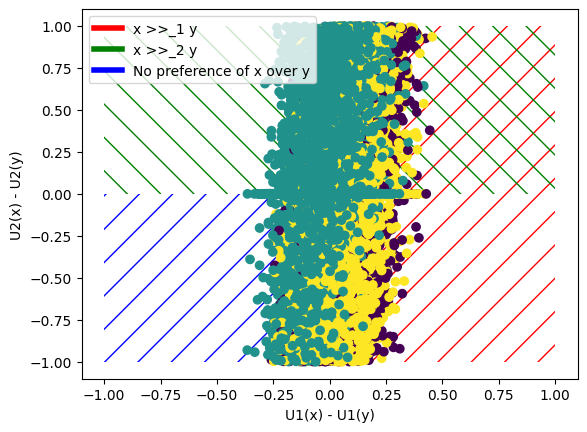

In [9]:
# Here is a proposition of a useful plot to see how the model clusters the data:
# We look at how each cluster evaluates U(x) - U(y) and color with ground truth clustering
# Note that x >>_1 y means that x is preferred to y for cluster 1
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

plt.figure()
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")

plt.gca().add_patch(Rectangle((0,-1.),1., 2.,
                    edgecolor='red',
                    facecolor='none',
                    lw=0, 
                    hatch='/'))
plt.gca().add_patch(Rectangle((-1.,0), 2., 1.,
                    edgecolor='green',
                    facecolor='none',
                    lw=0, 
                    hatch='\\'))
plt.gca().add_patch(Rectangle((-1.,-1.),1., 1.,
                    edgecolor='blue',
                    facecolor='none',
                    hatch='/',
                    lw=0))
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)

custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="green", lw=4),
                Line2D([0], [0], color="b", lw=4)]

plt.legend(custom_lines, ['x >>_1 y', "x >>_2 y ", 'No preference of x over y'])
plt.show()

Our random model cannot explain a large part of our preference data. Your first assigment will be to write a Mixed-Interger Programming algorithm that will be able to do so.

In [4]:
# This cell should work when you have completed the TwoClustersMIP model
from models import TwoClustersMIP

parameters = {"n_pieces": 5, "n_clusters" :2} # Can be completed
model = TwoClustersMIP(**parameters)
model.fit(X, Y)

# Uncomment once your model is working
print("Percentage of explained preferences on train data:", pairs_explained.from_model(model, X, Y)) # You should get 1.0 with the right MIP
print("Percentage of preferences well regrouped into clusters:", cluster_intersection.from_model(model, X, Y, Z))

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-11
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-6200U CPU @ 2.30GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 10018 rows, 12040 columns and 142352 nonzeros
Model fingerprint: 0xcca9fa12
Variable types: 8040 continuous, 4000 integer (4000 binary)
Coefficient statistics:
  Matrix range     [5e-05, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 6014 rows and 8024 columns
Presolve time: 0.32s
Presolved: 4004 rows, 4016 columns, 50168 nonzeros
Variable types: 4016 continuous, 0 integer (0 binary)

Root relaxation: objective 5.118996e+01, 1283 iterations, 0.42 seconds (0.46 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl

NameError: name 'pairs_explained' is not defined

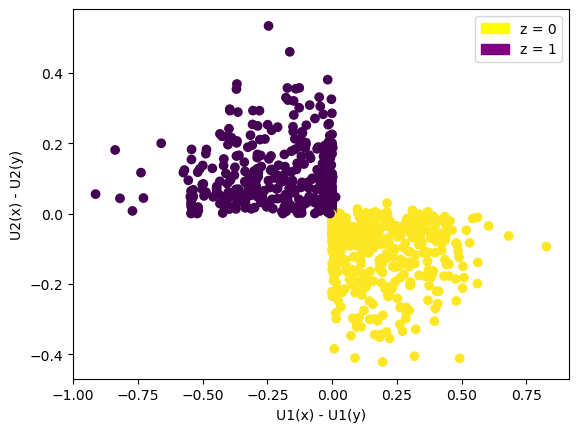

In [14]:
# As an example here are the results obtained with:
""" # Uncomment the code to check your results
plt.figure()
plt.scatter(model.predict_utility(X)[:, 0]-model.predict_utility(Y)[:, 0], 
            model.predict_utility(X)[:, 1]-model.predict_utility(Y)[:, 1], c=Z)
plt.xlabel("U1(x) - U1(y)")
plt.ylabel("U2(x) - U2(y)")
plt.show()
"""
# Here is how it should look like
from IPython.display import Image
Image("../images/MIP_results_example.png")

Your second assignement will be to find another model that will work well with larger data instances.